# Name : Mann Dsylva
# Roll no : 24mai009
#Machine Learning
#Supervised - Classification,Regression

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
df=load_iris()

In [2]:
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
df['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
df['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
#Features
X=pd.DataFrame(df['data'],columns=df['feature_names'])
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
Y=pd.DataFrame(df['target'],columns=['Labels'])
Y.head()

,Labels
0,0
1,0
2,0
3,0
4,0


In [7]:
#Seperate the data into training & validation sets
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,train_size=0.75)
#print(xtrain)
print(X.shape)
print(xtrain.shape)    #will be used as feature for training
print(xtest.shape)     #will be used as feature for validation

print('#############################')

print(Y.shape)
print(ytrain.shape)    #will be used as label for training
print(ytest.shape)     #will be used as label to compare for validation


(150, 4)
(112, 4)
(38, 4)
#############################
(150, 1)
(112, 1)
(38, 1)


#Algorithms for classification model
- KNN, SVM , Logistic Regression , Decision Tree Classifier, Random Forest Classifier etc.

#K-Nearest Neighbours

#Import the algorithm from sklearn Define the model to be trained

In [8]:
from sklearn.neighbors import KNeighborsClassifier
kmodel = KNeighborsClassifier()

In [9]:
#Train Your Model

kmodel.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [10]:
#Xtrain - Data used for training
#kmodel - Model which is trained using KNN

#make the prediction on the data given

ypred = kmodel.predict(xtrain)

#Compare the predicted value with given label

(ytrain == ypred.reshape(-1,1)).sum()/len(xtrain)

,0
Labels,0.964286


In [11]:
kmodel.score(xtrain,ytrain)

0.9642857142857143

In [12]:
#Validation for testing data
ytestP = kmodel.predict(xtest)
(ytest == ytestP.reshape(-1,1)).sum() / len(xtest)

,0
Labels,0.973684


In [13]:
kmodel.score(xtest,ytest)

0.9736842105263158

#K-fold cross validation

In [15]:
import numpy as np
training_accuracy = []
testing_accuracy = []
for i in range(10):
  xtrain,xtest,ytrain,ytest = train_test_split(X,Y,train_size=0.75)

  # Flatten the target arrays (ytrain, ytest)
  ytrain = np.array(ytrain).ravel()
  ytest = np.array(ytest).ravel()

  kmodel = KNeighborsClassifier()
  kmodel.fit(xtrain,ytrain)

  #training accuracy
  training_accuracy.append(kmodel.score(xtrain,ytrain))

  #Testing Accuracy
  testing_accuracy.append(kmodel.score(xtest,ytest))

# Output the accuracies
print("Training Accuracy:", training_accuracy)
print("Testing Accuracy:", testing_accuracy)

Training Accuracy: [0.9821428571428571, 0.9642857142857143, 0.9821428571428571, 0.9732142857142857, 0.9732142857142857, 0.9732142857142857, 0.9732142857142857, 0.9732142857142857, 0.9732142857142857, 0.9821428571428571]
Testing Accuracy: [0.9736842105263158, 0.9736842105263158, 0.9210526315789473, 0.9736842105263158, 0.9473684210526315, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 1.0, 0.9473684210526315]


In [16]:
import numpy as np
print(training_accuracy)
print(np.array(training_accuracy).mean())

[0.9821428571428571, 0.9642857142857143, 0.9821428571428571, 0.9732142857142857, 0.9732142857142857, 0.9732142857142857, 0.9732142857142857, 0.9732142857142857, 0.9732142857142857, 0.9821428571428571]
0.9750000000000002


#Deciding Hyper parameter - value of K for KNN

In [17]:
# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, train_size=0.75)

# Convert ytrain and ytest to numpy arrays and flatten them if necessary
ytrain = np.array(ytrain).ravel()
ytest = np.array(ytest).ravel()

training_acc = []
testing_acc = []

for i in range(1,12):
  kmodel = KNeighborsClassifier(n_neighbors = i)
  kmodel.fit(xtrain,ytrain)

  training_acc.append(kmodel.score(xtrain,ytrain))
  testing_acc.append(kmodel.score(xtest,ytest))

# Output the accuracies
print("Training Accuracies:", training_acc)
print("Testing Accuracies:", testing_acc)

Training Accuracies: [1.0, 0.9732142857142857, 0.9553571428571429, 0.9553571428571429, 0.9642857142857143, 0.9642857142857143, 0.9642857142857143, 0.9642857142857143, 0.9732142857142857, 0.9732142857142857, 0.9821428571428571]
Testing Accuracies: [0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9473684210526315, 0.9736842105263158, 0.9210526315789473, 1.0, 0.9473684210526315, 1.0]


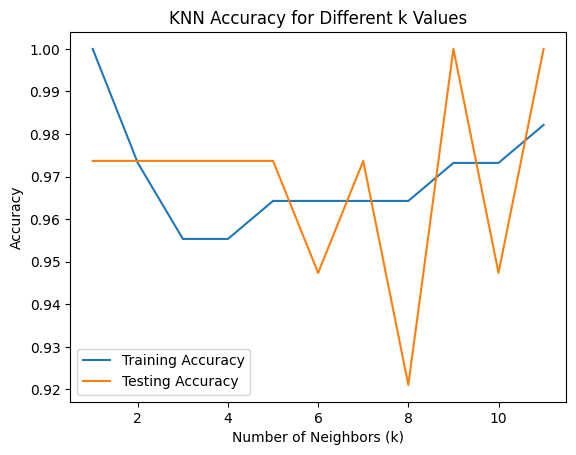

In [18]:
import matplotlib.pyplot as plt    #import library for plotting

plt.plot(range(1, 12), training_acc, label='Training Accuracy')
plt.plot(range(1, 12), testing_acc, label='Testing Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different k Values')
plt.legend()
plt.show()

In [25]:
feature_names=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
input_data1 = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]], columns=feature_names)
input_data2 = pd.DataFrame([[6.7, 3.0, 5.2, 2.3]], columns=feature_names)
# Make predictions using the DataFrame
# prediction1=kmodel.predict(input_data1)
# prediction2=kmodel.predict(input_data2)
# print("Prediction for 1>>>",prediction1)
# print("Prediction for 2>>>",prediction2)

# Make predictions using the DataFrame
prediction1 = kmodel.predict(input_data1)
prediction2 = kmodel.predict(input_data2)

# Print the predicted classes along with their corresponding labels
print("Prediction for 1>>>", prediction1, "Label:", class_labels[prediction1[0]],df['target_names'][prediction1[0]])
print("Prediction for 2>>>", prediction2, "Label:", class_labels[prediction2[0]],df['target_names'][prediction2[0]])

Prediction for 1>>> [0] Label: 0 setosa
Prediction for 2>>> [2] Label: 2 virginica


In [20]:
from collections import Counter

# Check the distribution of the training labels
print(Counter(ytrain))

Counter({2: 38, 0: 38, 1: 36})


In [22]:
class_labels = kmodel.classes_
class_labels

array([0, 1, 2])